In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [16]:
! git pull

remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 10 (delta 4), reused 10 (delta 4), pack-reused 0
Unpacking objects: 100% (10/10), done.
From https://github.com/jaentrouble/Adipose_tf_train
   c03c4c6..023e931  master     -> origin/master
Updating c03c4c6..023e931
Fast-forward
 adipose_models.py                   |  15 +++++-
 check_trained.ipynb                 |  98 ++++++++++++++++++++----------------
 model_lr.py                         |  11 ++++
 result_images/full_conv_4_2_val.png | Bin 0 -> 521940 bytes
 4 files changed, 80 insertions(+), 44 deletions(-)
 create mode 100644 result_images/full_conv_4_2_val.png


In [2]:
! echo enema1!ubuntu | sudo -S env/bin/python train_adipose.py -mf --name full_conv5_0 --epochs 10 --steps 100 --model full_conv5 -lr lr_mul_inv

2020-08-07 14:40:17.152167: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-07 14:40:18.465901: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-07 14:40:18.511297: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-07 14:40:18.511977: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2020-08-07 14:40:18.512017: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-07 14:40:18.514493: I tensorflow/stream_executor/platform/default

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
from model_tools import load_dataset, load_valset
import time

In [4]:

import matplotlib.pyplot as plt

In [29]:
Model_Name = 'full_conv5_0'

In [30]:
trained_model = keras.models.load_model('saved_model/'+Model_Name)

In [31]:
val_ds = load_valset('val_image',10)
test_ds = load_dataset('test_image',10)

In [32]:
img_batch, mask_batch = list(val_ds.take(1).as_numpy_iterator())[0]
print(img_batch.shape)
print(mask_batch.shape)

(32, 200, 200, 3)
(32, 100, 100)


In [33]:
st = time.time()
predict_batch = trained_model(img_batch)
print('took:{}'.format(time.time()-st))

took:0.047821760177612305


In [34]:
print(predict_batch.shape)

(32, 100, 100)


In [35]:
import numpy as np

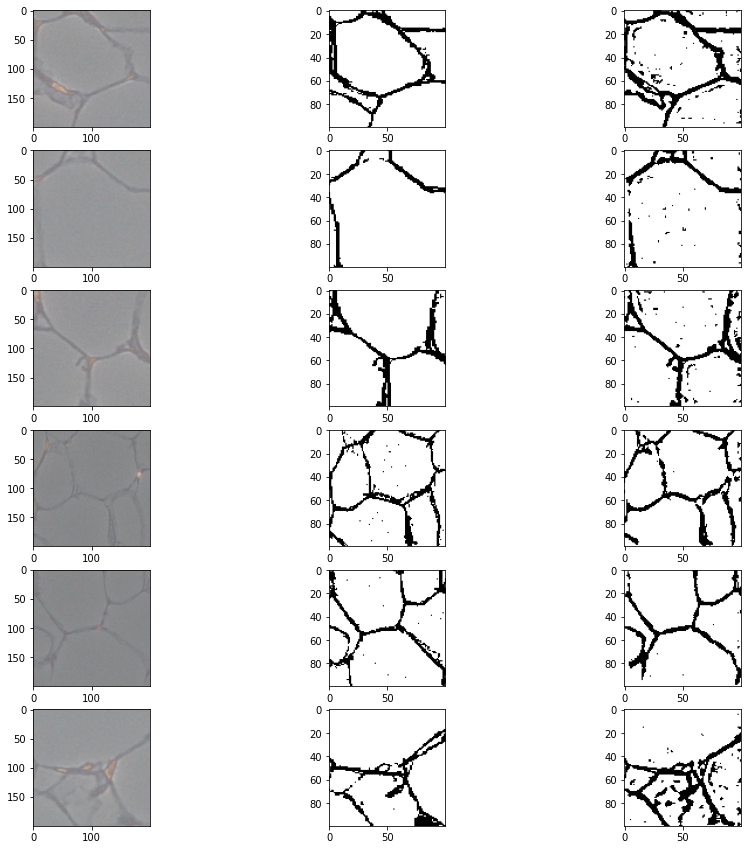

In [42]:
fig = plt.figure(figsize=(15,15))
i = 1
n = 6
for img, mask, pred in zip(img_batch[:n],mask_batch[:n],predict_batch[:n]):
    ax = fig.add_subplot(n,3,i)
    ax.imshow(img)
    ax = fig.add_subplot(n,3,i+1)
    ax.imshow(mask, cmap='binary')
    ax = fig.add_subplot(n,3,i+2)
    ax.imshow(pred>0.45, cmap='binary')
    i += 3
plt.show()

In [37]:
print(predict_batch[0][0])
print(np.min(predict_batch[0]))
print(np.max(predict_batch[0]))

tf.Tensor(
[0.07835981 0.07004896 0.10393038 0.17511447 0.30871102 0.34864512
 0.22541659 0.18967113 0.14402841 0.15456733 0.17231108 0.19102567
 0.23353152 0.26359943 0.1991522  0.19390947 0.2232077  0.3138402
 0.26855758 0.20181322 0.12907304 0.11201596 0.14294825 0.18550412
 0.33906123 0.45992506 0.63307005 0.7010995  0.7237002  0.74521303
 0.62589556 0.49127287 0.30373183 0.2605776  0.28577042 0.2738656
 0.25497246 0.32562777 0.40809983 0.31997073 0.39887464 0.33133605
 0.09670579 0.15052763 0.36477757 0.5899526  0.47387022 0.19329959
 0.07751766 0.06928942 0.09073549 0.32028958 0.62096643 0.6974029
 0.7019174  0.52801627 0.42847255 0.31038073 0.2516477  0.2560871
 0.21667379 0.25571522 0.21157968 0.17036992 0.11476479 0.12656909
 0.15830442 0.19345193 0.10781264 0.1603975  0.0548026  0.06608538
 0.10932483 0.09285216 0.13420755 0.1261379  0.2155158  0.25776508
 0.24598956 0.27038386 0.19390947 0.15895613 0.17272931 0.11201596
 0.16586316 0.19698064 0.25813892 0.35131106 0.21700546

In [38]:
print(img_batch[0][0])
print(np.min(img_batch[0]))
print(np.max(img_batch[0]))

[[0.59607846 0.6        0.60784316]
 [0.6        0.6        0.6117647 ]
 [0.59607846 0.59607846 0.60784316]
 [0.5921569  0.5921569  0.6039216 ]
 [0.5921569  0.5921569  0.6039216 ]
 [0.6        0.6        0.6156863 ]
 [0.59607846 0.59607846 0.6039216 ]
 [0.5921569  0.5882353  0.59607846]
 [0.5882353  0.58431375 0.5921569 ]
 [0.58431375 0.58431375 0.5882353 ]
 [0.5882353  0.5882353  0.59607846]
 [0.5921569  0.5921569  0.6       ]
 [0.59607846 0.5921569  0.6039216 ]
 [0.59607846 0.5921569  0.6039216 ]
 [0.59607846 0.5882353  0.6       ]
 [0.6039216  0.59607846 0.60784316]
 [0.60784316 0.6        0.6117647 ]
 [0.60784316 0.6        0.6117647 ]
 [0.60784316 0.6        0.6117647 ]
 [0.60784316 0.6        0.6117647 ]
 [0.60784316 0.59607846 0.6117647 ]
 [0.6039216  0.59607846 0.60784316]
 [0.6039216  0.5921569  0.6039216 ]
 [0.6        0.5921569  0.6039216 ]
 [0.6        0.5921569  0.6039216 ]
 [0.6        0.5921569  0.6039216 ]
 [0.6        0.59607846 0.6039216 ]
 [0.6039216  0.59607846 0.60